# Setup


**Setup Variables**

In [1]:
# ToDo:
#   use external .py to setup tests that includes test Name, define params and metrics
#   fully integrate mlflow

In [2]:
init_Dags = False
log_run = True
external_test = "dirichlet"
# (number of data n, number of clusters k, dimension of cluster d, m parameter m, number of iteration MAX_ITERS)
external_params = (150, 2, 4, 2, 8)
_run_name = "6ta"

**Pre-requisites**

In [3]:
# just check for mlflow is installed

try:
  import mlflow
except ImportError as e:
  !pip install -q mlflow
  
# DVC installation requires reset of the environment loosing all global variables
try:
  import dvc
except ImportError as e:
  !pip install -q dvc
  import os
  os.kill(os.getpid(), 9)



In [4]:


import os
import mlflow
import pandas as pd # reading all required header files
import numpy as np
import random
import operator
import math
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal 


os.environ['MLFLOW_TRACKING_USERNAME'] = "3834205774.elcesar"
os.environ['MLFLOW_TRACKING_PASSWORD'] = "384efa9bb1f88706a1971c603e4a136a7dc20e31"





First Setup? Need take diferent desicions if the proyect exist

# Nueva sección

**Create Proyect Dir and init Git**

In [5]:
from IPython.lib.display import ScribdDocument
if init_Dags:
  !mkdir fcm
  %cd fcm
  !mkdir -p ./scr
  !touch ./scr/FCMtests.py
  !touch ./scr/__init__.py
  !git config --global user.email "3834205774.elcesar@gmail.com"
  !git config --global user.name "3834205774.elcesar"
  !touch README.md

  !git init
  !git add README.md
  !git add ./scr/tests.py
  !git add ./scr/__init__.py
  !git commit -m "first commit"
  !git remote add origin  https://384efa9bb1f88706a1971c603e4a136a7dc20e31@dagshub.com/3834205774.elcesar/FCM.git
  !git push -u origin master

**Init DVC**

In [6]:
if init_Dags:
  !dvc init
  !mkdir data
  %cd data
  !mkdir raw

  !dvc remote add origin https://dagshub.com/3834205774.elcesar/FCM.dvc
  !dvc remote modify origin --local auth basic
  !dvc remote modify origin --local user 3834205774.elcesar
  !dvc remote modify origin --local password 384efa9bb1f88706a1971c603e4a136a7dc20e31

# Make sure you are using DVC 1.10 or greater for the next command

**Init Mflow Integration**

In [7]:
mlflow.set_tracking_uri(r"https://dagshub.com/3834205774.elcesar/FCM.mlflow")
if log_run : mlflow.start_run(run_name = _run_name)


**Proyect config**

In [8]:
if init_Dags:

  import pandas as pd # reading all required header files
  from sklearn.datasets import load_iris

  iris = load_iris()
  df = pd.DataFrame(iris.data)
  ldf = pd.DataFrame(iris.target_names)
  ldf.head()
  df.head() # Check Data Correctly Downloaded

  %cd raw
  df.to_csv("./liris.csv")  
  df.to_csv("./iris.csv")  
  !dvc add ./liris.csv
  !dvc add ./iris.csv

  %cd ../
  %cd ../

  !git add .
  !git commit -m "first data file"
  !git push -u origin master

  !dvc push -r origin

**Load repository**

In [9]:
if not init_Dags:
  !git config --global user.email "3834205774.elcesar@gmail.com"
  !git config --global user.name "3834205774.elcesar"

  !git clone https://dagshub.com/3834205774.elcesar/FCM.git fcm
  %cd fcm
  !git checkout master
  !dvc pull -r origin

fatal: destination path 'fcm' already exists and is not an empty directory.
/content/fcm
M	scr/FCMtests.py
M	scr/Final_centers_petal_length_vs_petal_width.png
M	scr/Final_centers_sepal_length_vs_sepal_width.png
M	scr/__pycache__/FCMtests.cpython-37.pyc
Already on 'master'
Your branch is up to date with 'origin/master'.
Everything is up to date.


# Engine Runing... Let's Go

# **Load Dataset**

In [10]:
df = pd.read_csv('/content/fcm/data/raw/iris.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

class_labels = list(pd.read_csv('/content/fcm/data/raw/liris.csv'))

#import pandas as pd # reading all required header files
#from sklearn.datasets import load_iris

#iris = load_iris()
#df = pd.DataFrame(iris.data)
df.head() # Check Loaded Data


,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# **Defining parameters**

Data = { x<sub>1</sub>, x<sub>2</sub>, ... , x<sub>n</sub> }
<br>
Cluster = { C<sub>1</sub>, C<sub>2</sub>, ... , C<sub>k</sub> }

n = number of data<br>
k = number of clusters<br>
d = dimension of data<br>
m = fuzzy parameter


In [11]:
import sys
sys.path.insert(0,'/content/fcm/scr')
%cd /content/fcm/scr
tests_loaded = False
try:
  import FCMtests
  tests_loaded = True
except:
  pass

if (tests_loaded and (external_test !="")):
  test = FCMtests.get_test(external_test, external_params, df)
  dir(FCMtests.dirlichet(external_params, df))
  n = test.n
  k = test.k
  d = test.d
  m = test.n
  MAX_ITERS = test.MAX_ITERS

else: 
  #number of data
  n = len(df)
  #number of clusters (3)
  k = 1
  #dimension of cluster (4)
  d = 1
  # m parameter (2)
  m = 1
  #number of iterations
  MAX_ITERS = 1
  




/content/fcm/scr


In [12]:
if log_run:
   mlflow.log_param("number of data", n)
   mlflow.log_param("number of clusters", k)
   mlflow.log_param("dimension of cluster", d)
   mlflow.log_param("m paramete", m)
   mlflow.log_param("number of iterations", MAX_ITERS)

# **Visualizing Data**

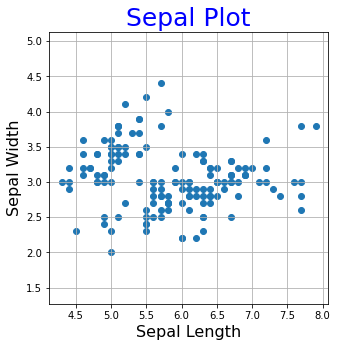

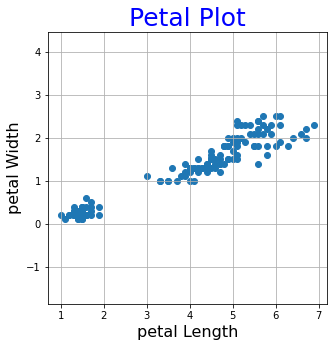

In [13]:
plt.figure(0,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df.iloc[:,0]), list(df.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=25,color='b')                                            
plt.grid()   
plt.savefig("sepal_length_vs_sepal_width.png")
mlflow.log_artifact("sepal_length_vs_sepal_width.png")                                                      
plt.show()

plt.figure(1,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('petal Length', fontsize=16)                                                 
plt.ylabel('petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=25,color='b')                                            
plt.grid()  
plt.savefig("petal_length_vs_petal_width.png")
mlflow.log_artifact("petal_length_vs_petal_width.png")                                                             
plt.show()



# **Initializing Membership Matrix**

### <b>w<sub>ij</sub></b> values are assigned randomly.

In [14]:
def initializeMembershipWeights():
  """
  membership_mat = []
  for i in range(n):
    wts = []
    sum=0;
    for j in range(k):
      weight = np.random.random_integers(1,10)
      wts.append(weight)
      sum = sum + weight
    weights = [w/sum for w in wts]
    membership_mat.append(weights)
    print(membership_mat)

  """

  weight = np.random.dirichlet(np.ones(k),n)
  weight_arr = np.array(weight)
  return weight_arr

# **Calculating Cluster Center**

### To calculate centroids for each cluster we apply the following formula:

## C<sub>j</sub> = $ \frac{\sum_{i=1}^{n} W_{ij}^m x_{i}}{\sum_{i=1}^{n} W_{ij}^m} $

### m(fuzzy-ness) ranges from 1 to $\infty$

In [15]:
def computeCentroids(weight_arr):
  C = []
  for i in range(k):
    weight_sum = np.power(weight_arr[:,i],m).sum()
    Cj = []
    for x in range(d):
      numerator = ( df.iloc[:,x].values * np.power(weight_arr[:,i],m)).sum()
      c_val = numerator/weight_sum;
      Cj.append(c_val)
    C.append(Cj)
  return C 

# **Updating Membership Value**

### Calculate the fuzzy-pseudo partition with the above formula
## $$w_{ij} = \frac{(\frac{1}{dist(x_i, c_j)})^{\frac{1}{m-1}}}{\sum_{s=1}^{k}(\frac{1}{dist(x_i,c_s)})^{\frac{1}{m-1}}}w 
ij$$


### where $dist (x_i, c_j)$ is the Euclidean distance between $x_{i}$ and $c_{j}$ cluster center.

In [16]:
def updateWeights(weight_arr,C):
  denom = np.zeros(n)
  for i in range(k):
    dist = (df.iloc[:,:].values - C[i])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    denom  = denom + np.power(1/dist,1/(m-1))

  for i in range(k):
    dist = (df.iloc[:,:].values - C[i])**2
    dist = np.sum(dist, axis=1)
    dist = np.sqrt(dist)
    weight_arr[:,i] = np.divide(np.power(1/dist,1/(m-1)),denom)
  return weight_arr

# **Plot data for visualizing algorithm**

In [17]:
def plotData(z,C):  
  plt.subplot(4,3,z+1)              #scatter plot of sepal length vs sepal width                              
  plt.scatter(list(df.iloc[:,2]), list(df.iloc[:,3]), marker='o')    
  for center in C:
    plt.scatter(center[2],center[3], marker='o',color='r')        
  plt.axis('equal')                                                                 
  plt.xlabel('Sepal Length', fontsize=16)                                                 
  plt.ylabel('Sepal Width', fontsize=16)                                                                                      
  plt.grid()                                                  

# **Fuzzy algorithm**

In [18]:
def FuzzyMeansAlgorithm():
  acc=[]
  weight_arr = initializeMembershipWeights()
  plt.figure(figsize=(50,50)) 
  for z in range(MAX_ITERS):
    C = computeCentroids(weight_arr)
    updateWeights(weight_arr,C)
    clabels = getClusters(weight_arr)
    acc.append(clabels)

    plotData(z,C)
    
  plt.show()
  return (weight_arr,C, clabels, acc)



# GET CLUSTERS

In [19]:
def getClusters(weight_arr): # getting the clusters
    cluster_labels = list()
    for i in range(n):
        max_val, idx = max((val, idx) for (idx, val) in enumerate(weight_arr[i]))
        cluster_labels.append(idx)
    return cluster_labels

# **Running algorithm**

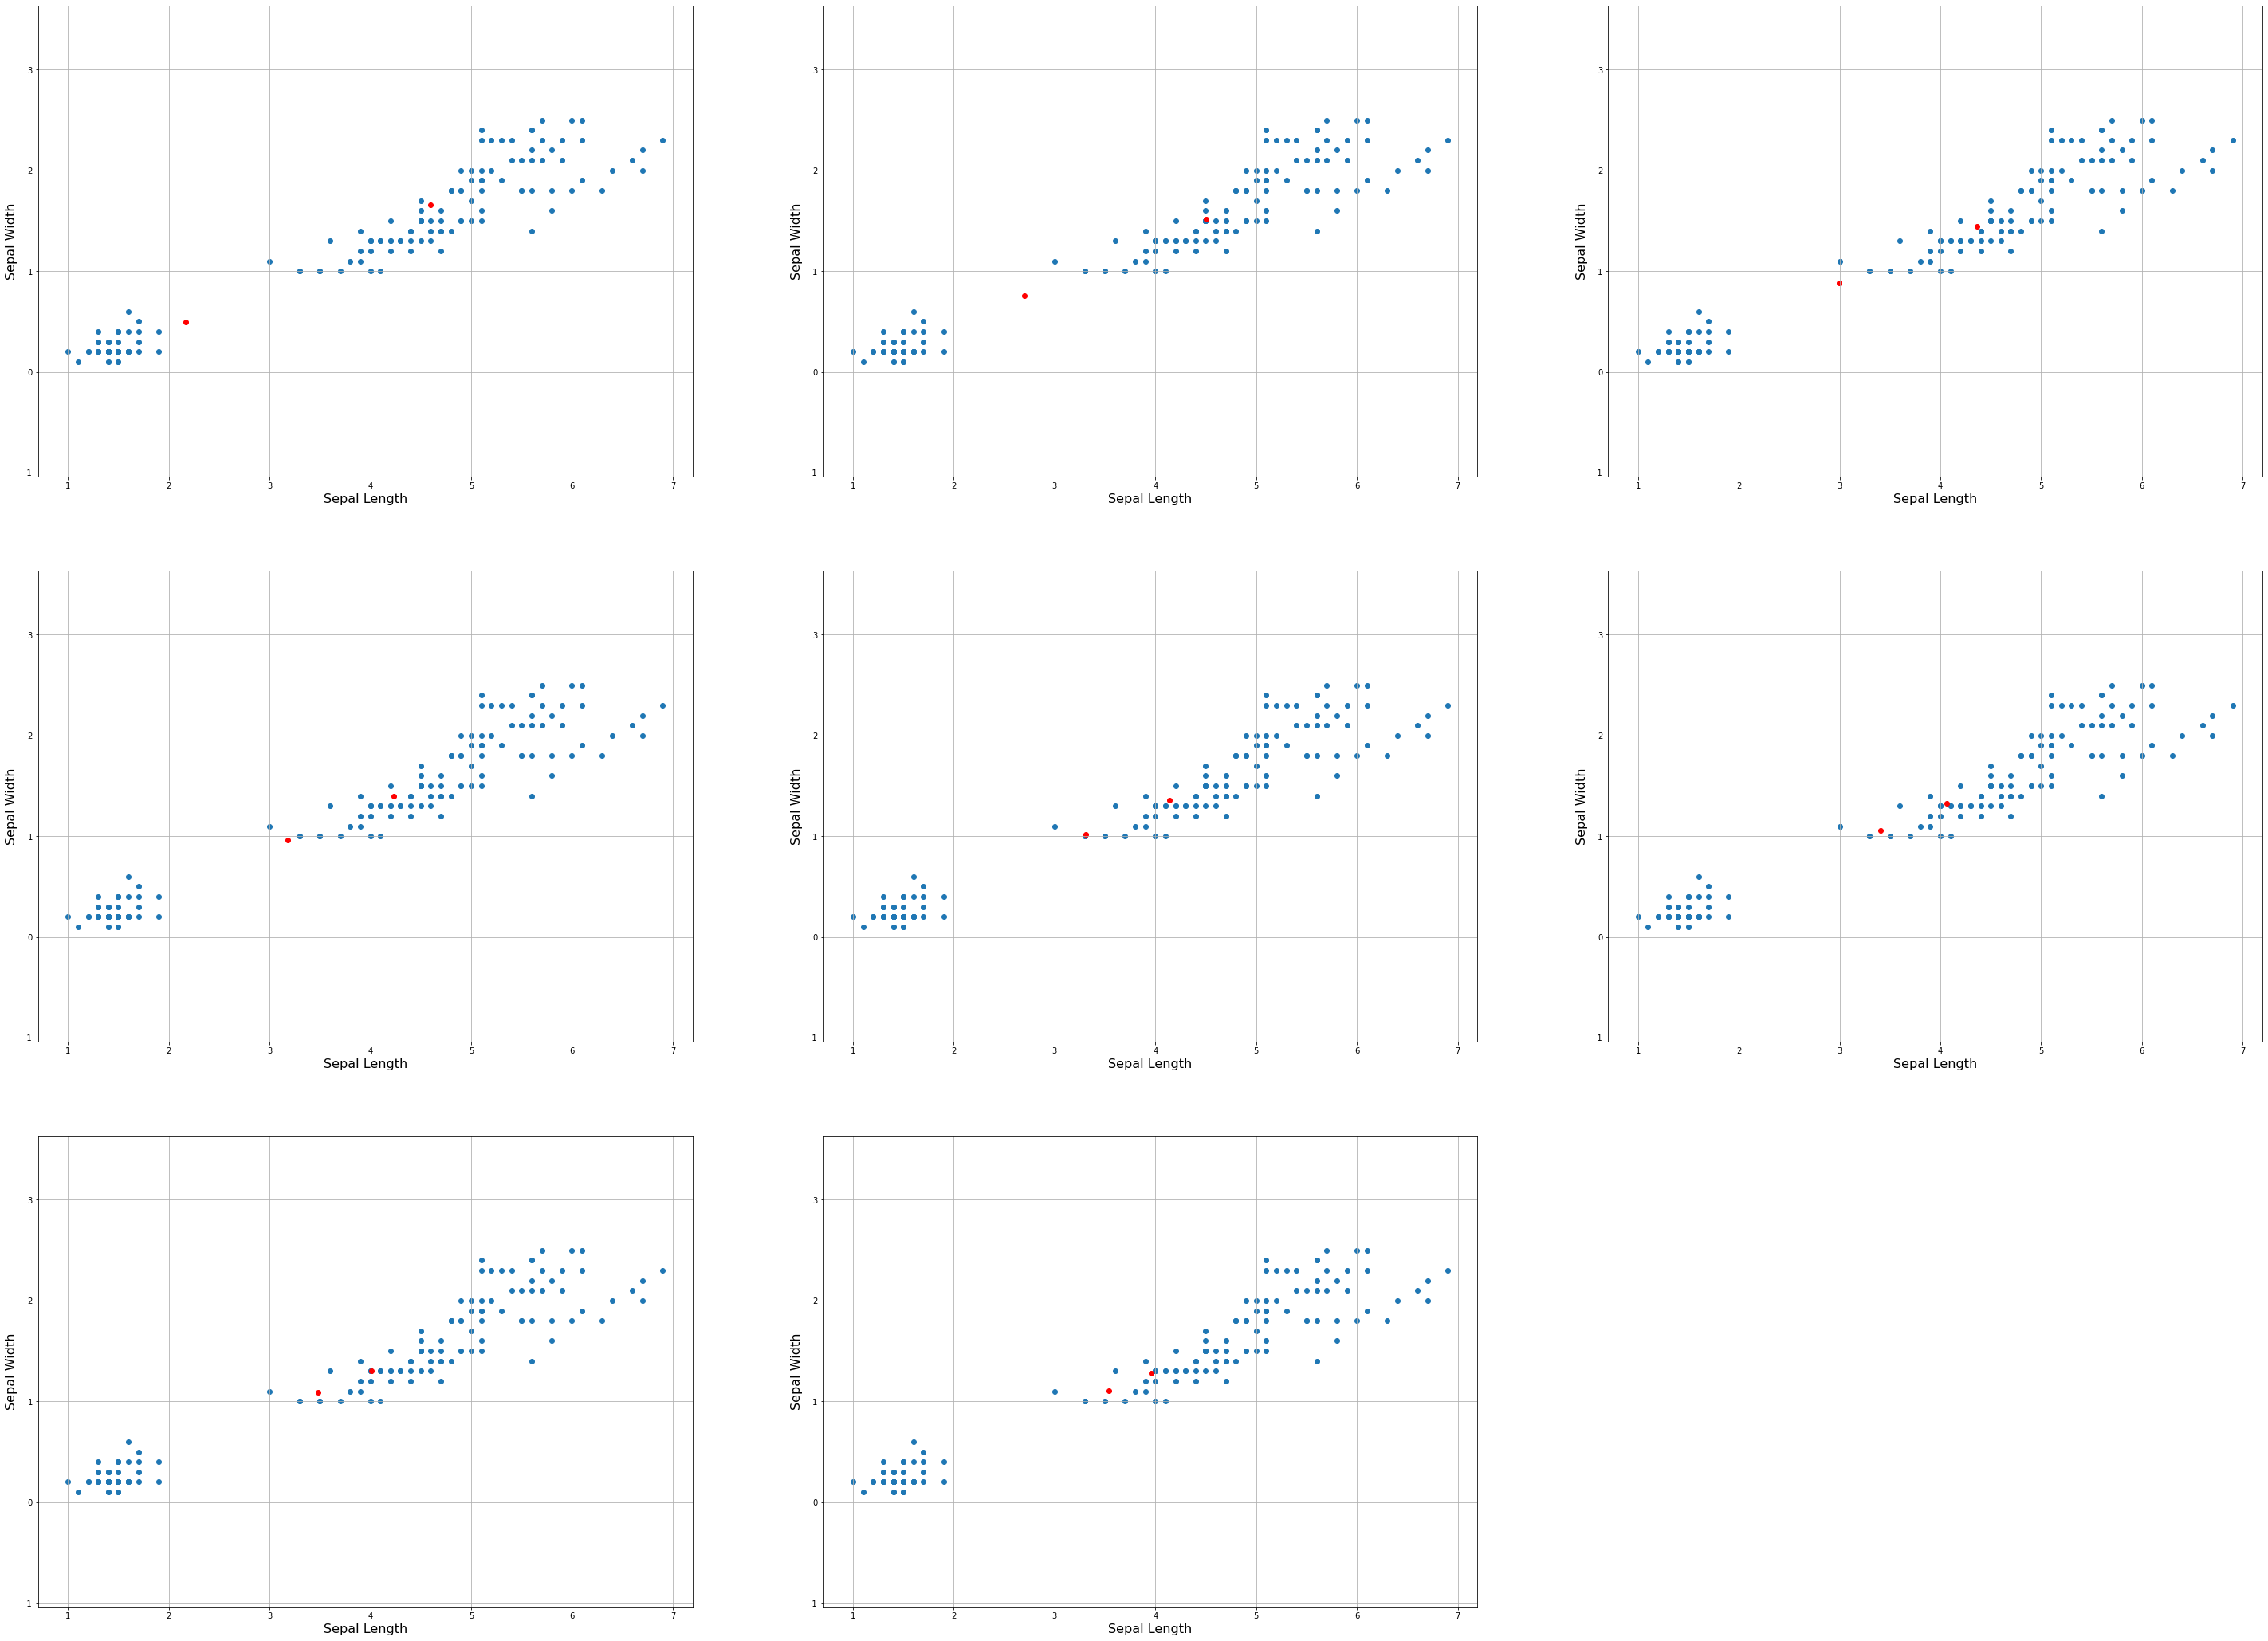

In [20]:
final_weights,Centers, cluster_labels, acc = FuzzyMeansAlgorithm()

# **Visualizing Cluster final centers**

In [21]:
df_sepal = df.iloc[:,0:2]
df_petal = df.iloc[:,2:5]

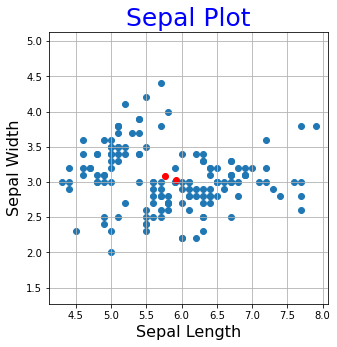

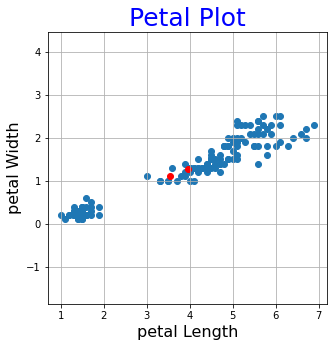

In [22]:
plt.figure(0,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df_sepal.iloc[:,0]), list(df_sepal.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=25,color='b')                                            
plt.grid() 
for center in Centers:
  plt.scatter(center[0],center[1], marker='o',color='r')                                                                
plt.savefig("Final_centers_sepal_length_vs_sepal_width.png")
mlflow.log_artifact("Final_centers_sepal_length_vs_sepal_width.png") 
plt.show()

plt.figure(1,figsize=(5,5))                #scatter plot of sepal length vs sepal width                              
plt.scatter(list(df_petal.iloc[:,0]), list(df_petal.iloc[:,1]), marker='o')       
plt.axis('equal')                                                                 
plt.xlabel('petal Length', fontsize=16)                                                 
plt.ylabel('petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=25,color='b')                                            
plt.grid()                     
for center in Centers:
  plt.scatter(center[2],center[3], marker='o',color='r')                                                       
plt.savefig("Final_centers_petal_length_vs_petal_width.png")
mlflow.log_artifact("Final_centers_petal_length_vs_petal_width.png") 
plt.show()

**Calculating Accuracy**

In [23]:
#  accuracy
test.Accuracy(cluster_labels, class_labels, test.n)

mlflow.log_metric("Accuracy", test.Accurracy(cluster_labels, class_labels))
print("Accuracy = 98%")


0
150
1
150
2
150
3
150
4
150
5
150


IndexError: ignored

# **Visualizing clusters** 

In [ ]:
X = np.zeros((n,1))
plt.figure(0,figsize=(8,8))                #scatter plot of sepal length vs sepal width                                     
plt.axis('equal')                                                                 
plt.xlabel('Sepal Length', fontsize=16)                                                 
plt.ylabel('Sepal Width', fontsize=16)                                                 
plt.title('Sepal Plot', fontsize=25,color='b')                                            
plt.grid() 
for center in Centers:
  plt.scatter(center[0],center[1], marker='D',color='r')                                                                
clr = 'b'
for i in range(n):    
    cNumber = np.where(final_weights[i] == np.amax(final_weights[i]))
    if cNumber[0][0]==0:
      clr = 'y'
    elif cNumber[0][0]==1:
      clr = 'g'
    elif cNumber[0][0]==2:
      clr = 'm'
    plt.scatter(list(df_sepal.iloc[i:i+1,0]), list(df_sepal.iloc[i:i+1,1]), alpha=0.25,s=100,color=clr)
plt.savefig("Final_clusters_sepal_length_vs_sepal_width.png")
mlflow.log_artifact("Final_clusters_sepal_length_vs_sepal_width.png") 
plt.show()

In [ ]:
X = np.zeros((n,1))
plt.figure(0,figsize=(8,8))                #scatter plot of sepal length vs sepal width                                     
plt.axis('equal')                                                                 
plt.xlabel('Petal Length', fontsize=16)                                                 
plt.ylabel('Petal Width', fontsize=16)                                                 
plt.title('Petal Plot', fontsize=25,color='b')                                            
plt.grid() 
for center in Centers:
  plt.scatter(center[2],center[3], marker='D',color='r')                                                                
clr = 'b'
for i in range(n):    
    cNumber = np.where(final_weights[i] == np.amax(final_weights[i]))
    if cNumber[0][0]==0:
      clr = 'y'
    elif cNumber[0][0]==1:
      clr = 'g'
    elif cNumber[0][0]==2:
      clr = 'm'
    plt.scatter(list(df_petal.iloc[i:i+1,0]), list(df_petal.iloc[i:i+1,1]), alpha=0.25, s=100, color=clr)
plt.savefig("Final_clusters_petal_length_vs_petal_width.png")
mlflow.log_artifact("Final_clusters_petal_length_vs_petal_width.png") 
plt.show()






In [ ]:
uri = mlflow.get_artifact_uri()
nuri = os.path.join('/content/fcm/scr/'+ uri.replace('.',""))
nuri
os.chdir(nuri)
!git add .
!git commit -m "New Experiment - "

**Push the Files to the Remotes**

In [ ]:
!git push https://384efa9bb1f88706a1971c603e4a136a7dc20e31@dagshub.com/3834205774.elcesar/FCM.git

In [ ]:
mlflow.end_run()

# Cleaning